## Import Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

print("Libraries imported successfully")


Libraries imported successfully


## Load the Dataset :

In [2]:
# Load Titanic data
df = pd.read_csv("/content/Titanic-Dataset.csv")
print("Dataset loaded")



Dataset loaded


In [3]:
print(f"Shape: {df.shape}")
df.head()

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Initial Info & Missing Values :

In [4]:
# Show structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Show missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


## Data Cleaning :

In [6]:
# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)


In [7]:
# Fill Embarked with mode (most common)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-1984939041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [8]:
# Fill Age using class-based median
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))


In [9]:
print("Missing values after cleaning:")
df.isnull().sum().sort_values(ascending=False)

Missing values after cleaning:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Engineer Features :

In [10]:
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [11]:
# Is Alone feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [12]:
# Extract Title from Name
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


In [13]:
# Rare titles mapping
rare_titles = [
    'Lady','Countess','Capt','Col','Don','Dr',
    'Major','Rev','Sir','Jonkheer','Dona'
]
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

print("Features engineered successfully")
df[['FamilySize','IsAlone','Title']].head()


Features engineered successfully


,FamilySize,IsAlone,Title
0,2,0,Mr
1,2,0,Mrs
2,1,1,Miss
3,2,0,Mrs
4,1,1,Mr


## Survival Overview :

Overall survival rate: 38.38%


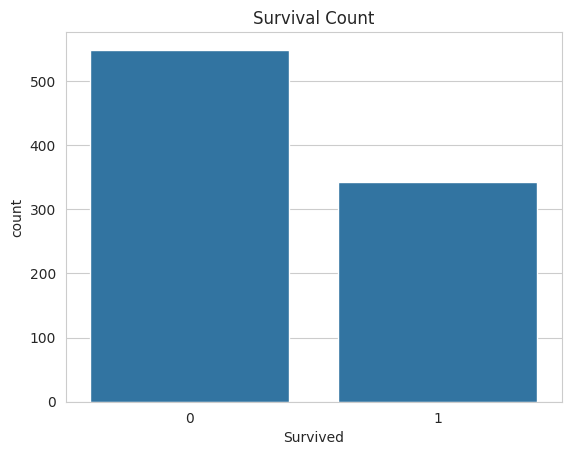

In [14]:
survival_rate = df['Survived'].mean() * 100
print(f"Overall survival rate: {survival_rate:.2f}%")

sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()


## Demographics: Sex vs Survival

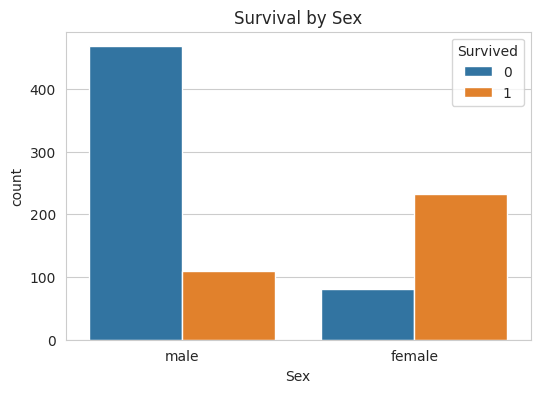

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()


## Age Distribution :

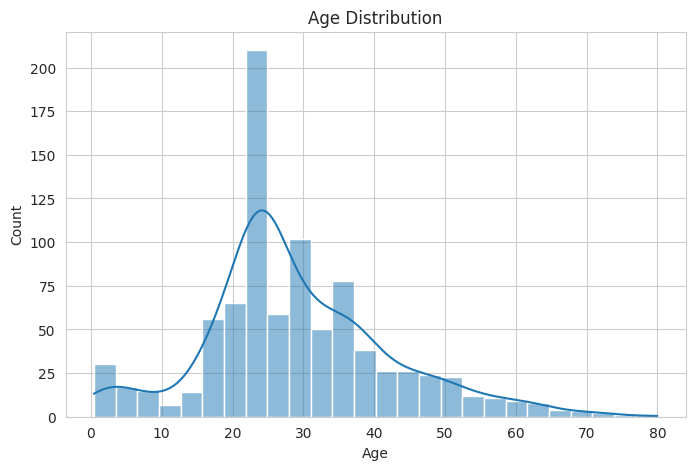

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


## Survival by Passenger Class :

In [17]:
fig = px.bar(df.groupby('Pclass')['Survived'].mean().reset_index(),
             x='Pclass', y='Survived', title='Survival Rate by Pclass')
fig.show()


## Survival by Family Size :

In [18]:
fig = px.bar(df.groupby('FamilySize')['Survived'].mean().reset_index(),
             x='FamilySize', y='Survived', title='Survival by Family Size')
fig.show()


## Survival by Title :

In [19]:
fig = px.bar(df.groupby('Title')['Survived'].mean().reset_index(),
             x='Title', y='Survived', title='Survival by Title')
fig.show()


## Correlation Matrix :

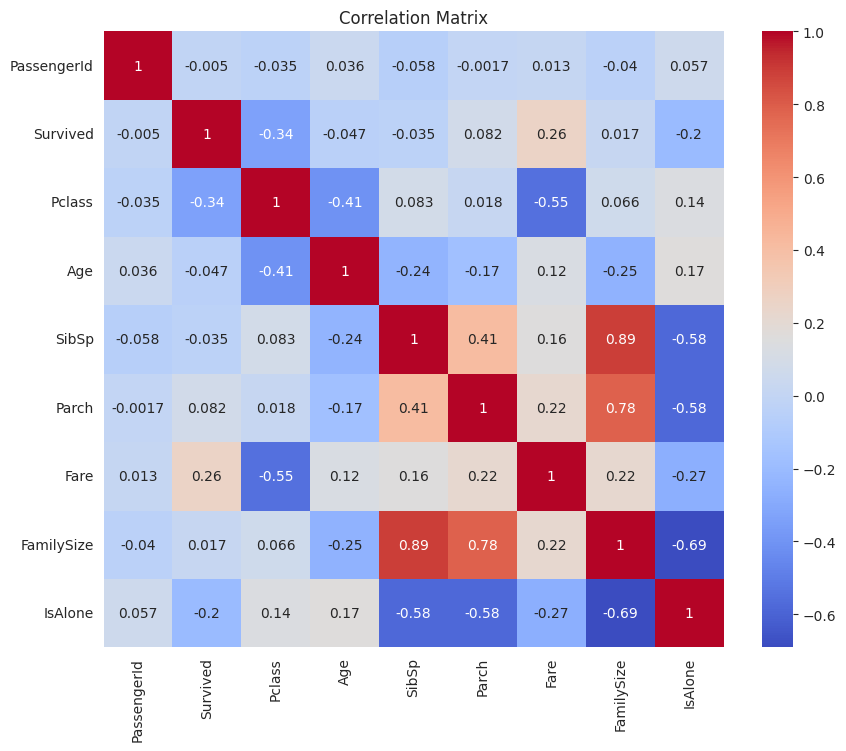

In [20]:
numeric = df.select_dtypes(include=np.number).columns
corr = df[numeric].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Statistical Tests :

In [21]:
results = {}

# Chi-Square: Sex vs Survival
ctab = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, _, _ = stats.chi2_contingency(ctab)
results['Chi-Square(Sex vs Survival)'] = f"Chi2={chi2:.2f}, p={p:.4f}"

# T-Test: Age for Survived vs Not
survived_age = df[df['Survived']==1]['Age']
not_survived_age = df[df['Survived']==0]['Age']
t_stat, p_val = stats.ttest_ind(survived_age, not_survived_age)
results['T-Test(Age)'] = f"t-stat={t_stat:.2f}, p={p_val:.4f}"

# Show results
print("Statistical Test Results:")
for k,v in results.items():
    print(f"{k} → {v}")


Statistical Test Results:
Chi-Square(Sex vs Survival) → Chi2=260.72, p=0.0000
T-Test(Age) → t-stat=-1.41, p=0.1587


## Export Cleaned Dataset :

In [22]:
# Save cleaned, feature-enhanced dataset for dashboard use
df.to_csv("titanic_cleaned_for_dashboard.csv", index=False)
print("Exported cleaned dataset as titanic_cleaned_for_dashboard.csv")


Exported cleaned dataset as titanic_cleaned_for_dashboard.csv
